In [34]:
#21MIS1006-Fadilah
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [7]:
# Load data 
data = pd.read_csv("/home/ex5/Desktop/21MIS1006/archive/Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


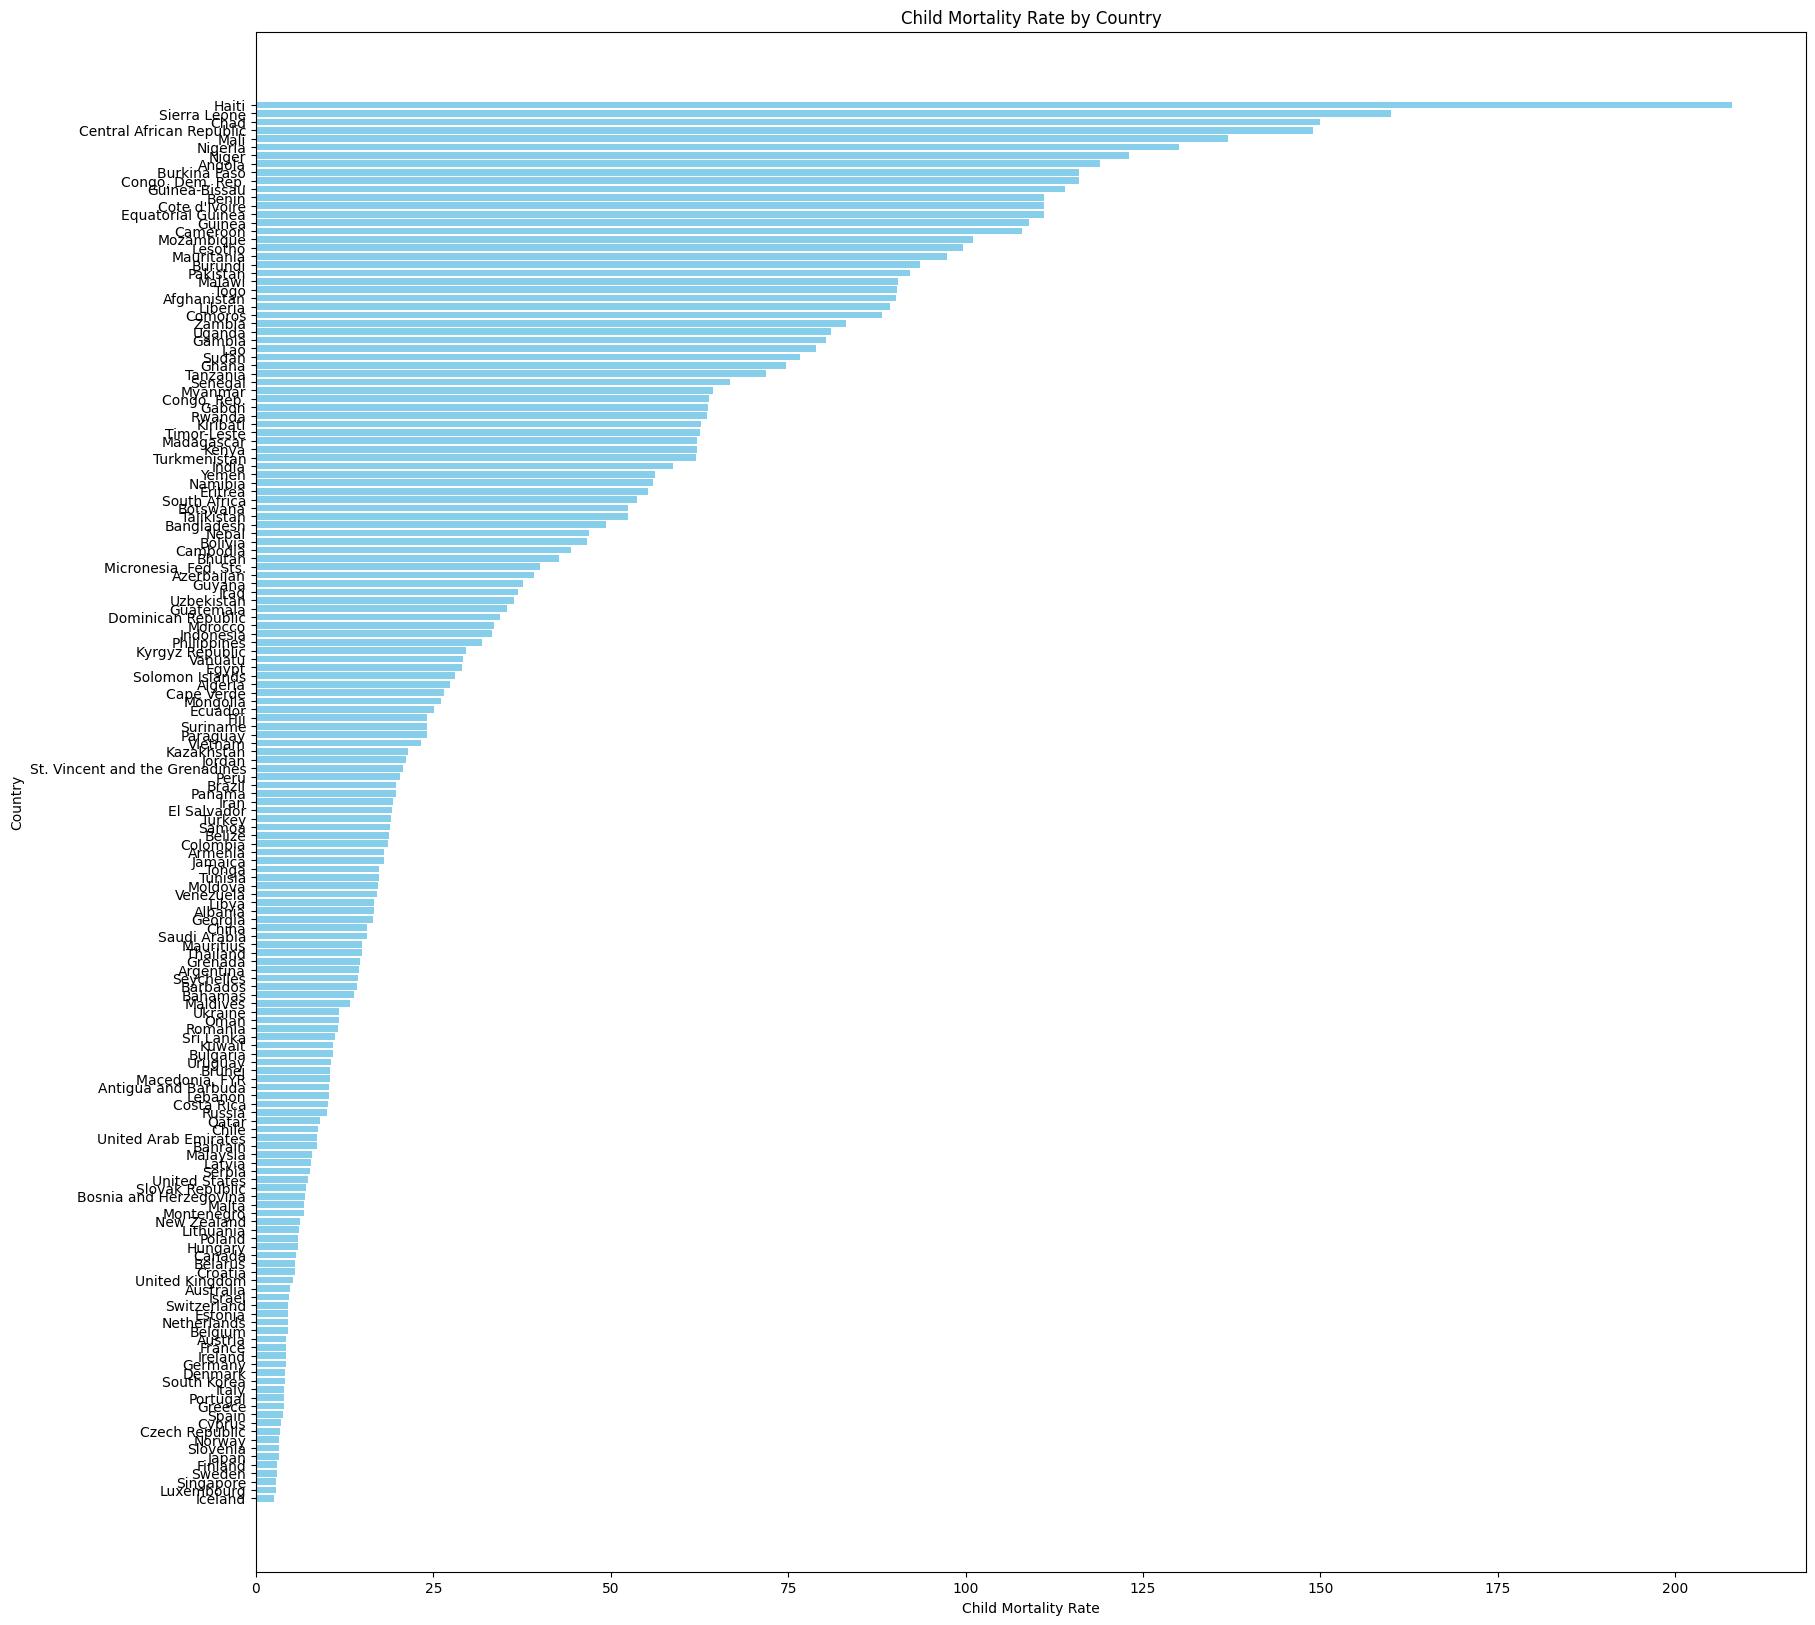

In [33]:
#Visualize the dataset 
# Sort data by 'child_mort' for better visualization
data_sorted = data.sort_values(by='child_mort', ascending=False)
# Plot
plt.figure(figsize=(20,20))
plt.barh(data_sorted['country'], data_sorted['child_mort'], color='skyblue')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Country')
plt.title('Child Mortality Rate by Country')
plt.gca().invert_yaxis()  # Invert y-axis to display countries with highest child mortality at the top
plt.show()

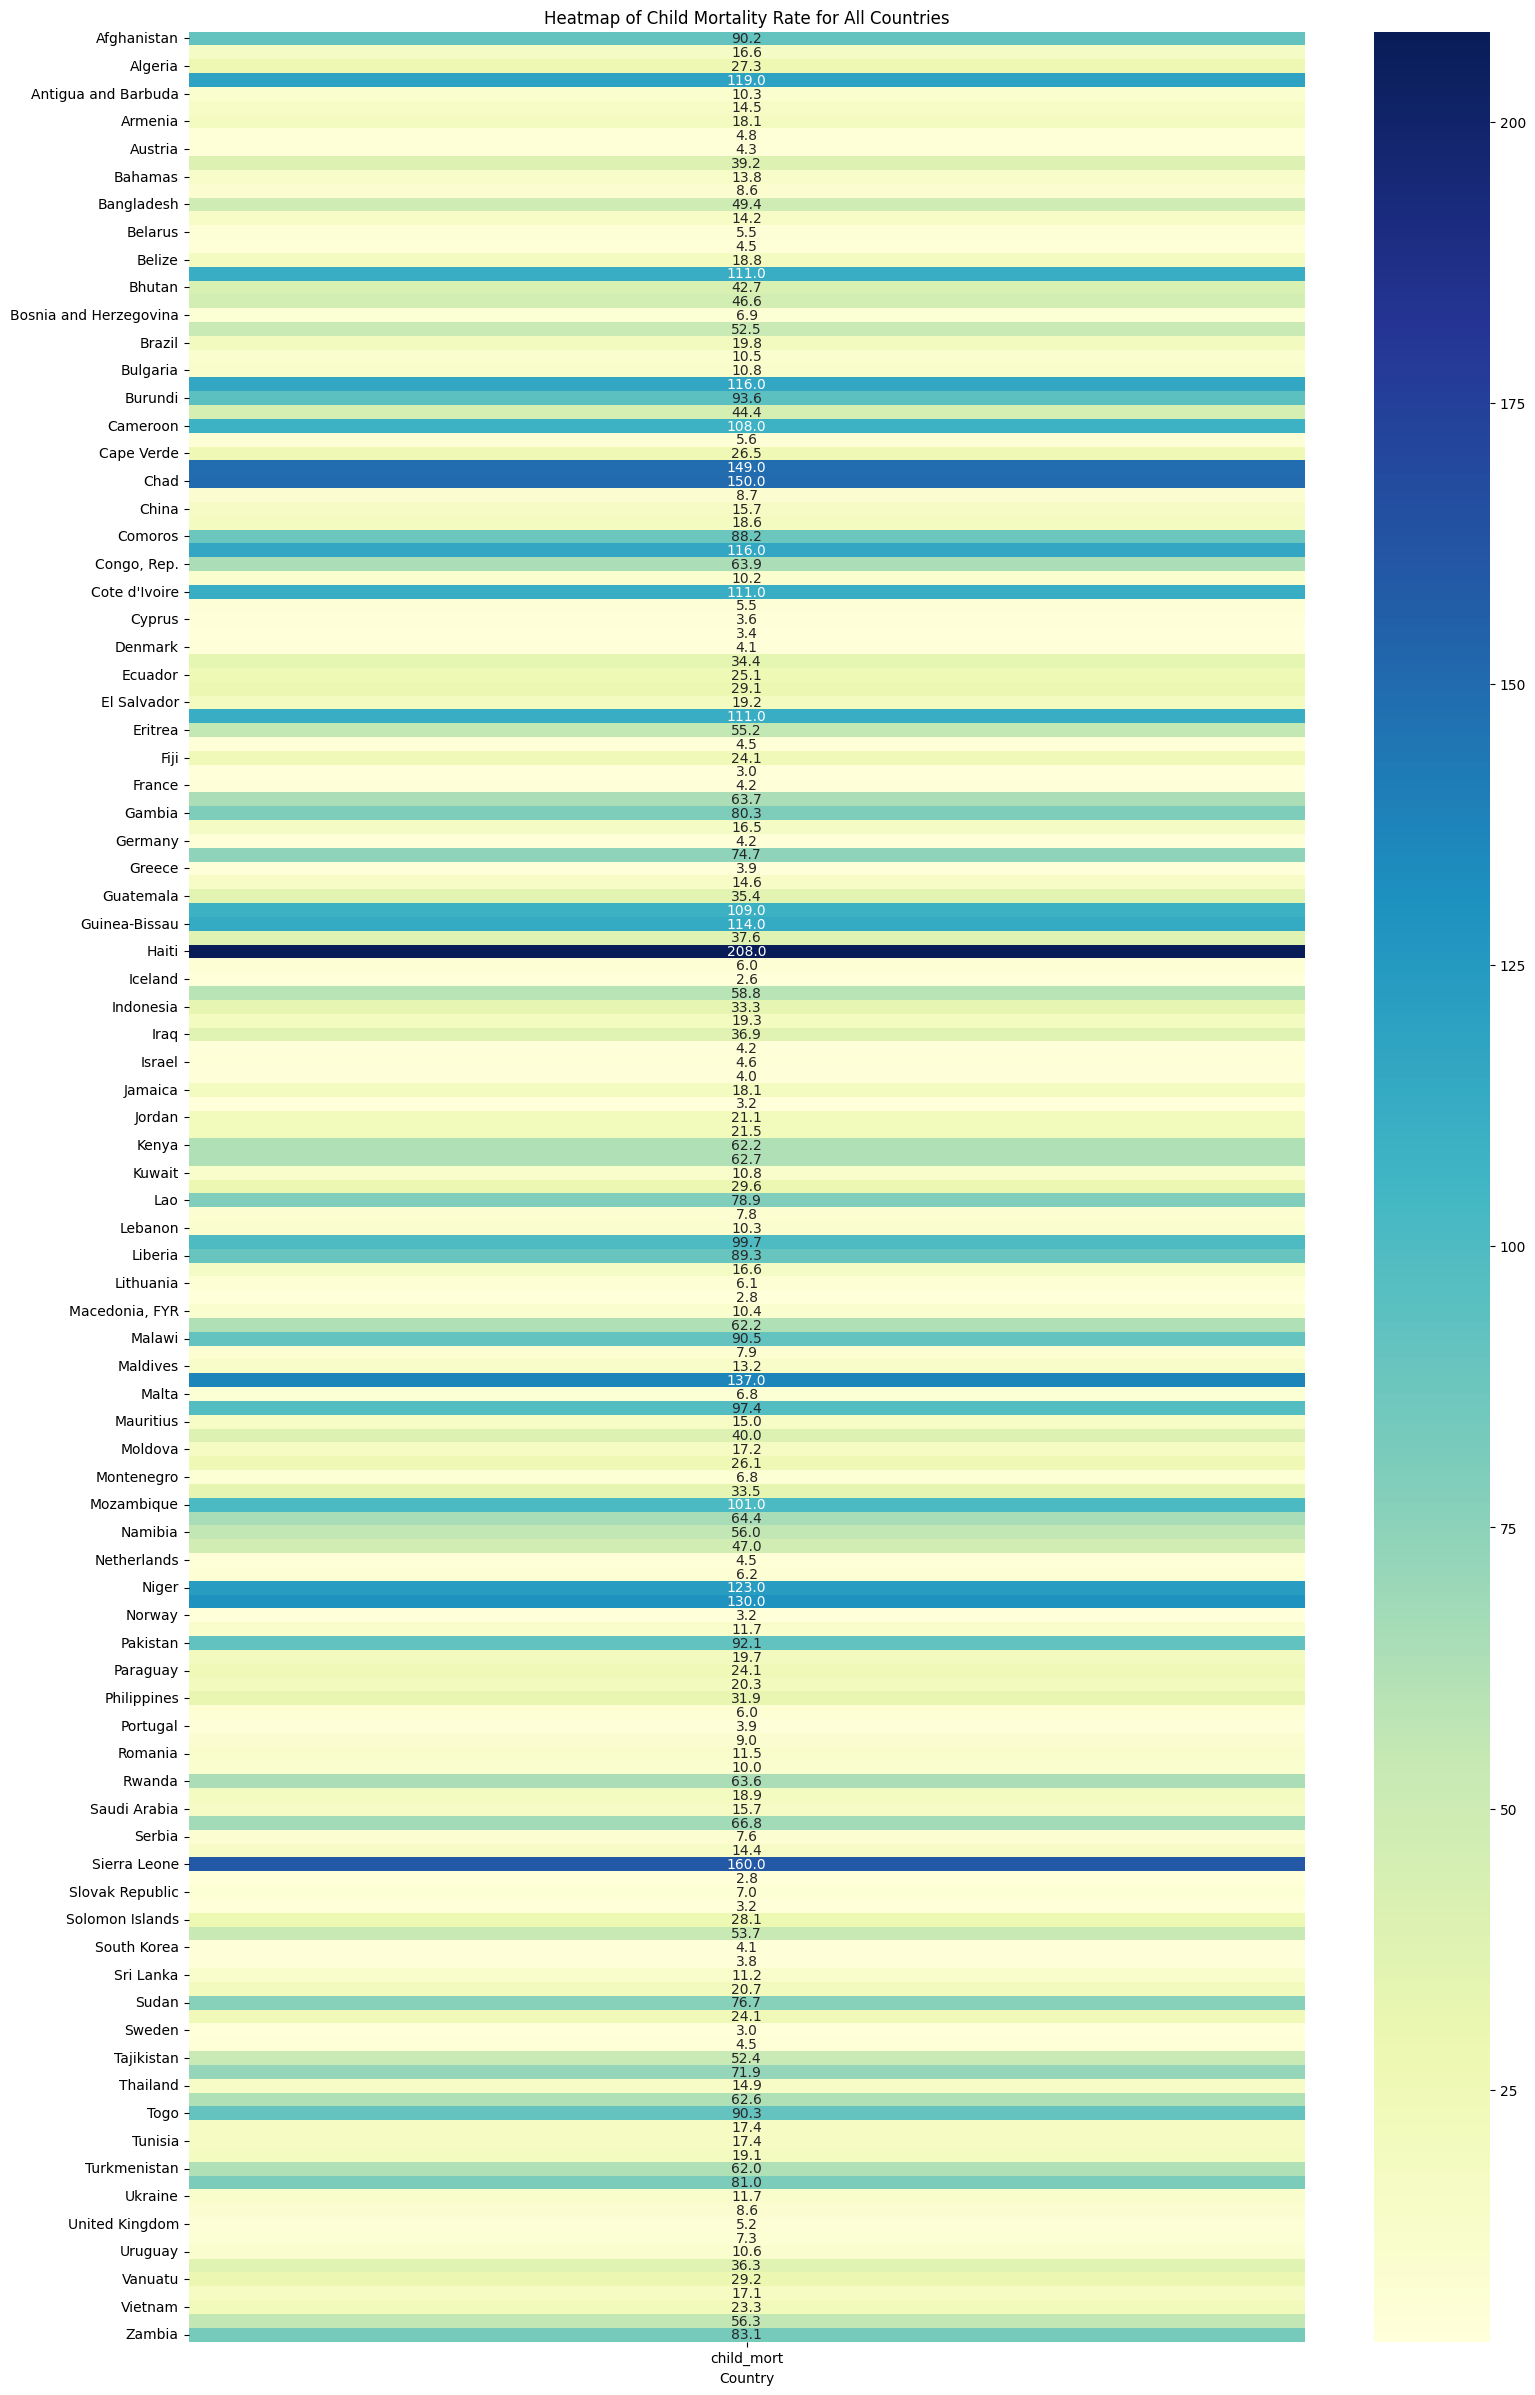

In [47]:

# Sort data by 'child_mort' for better visualization
data_sorted = data.sort_values(by='child_mort', ascending=False)

# Plot
plt.figure(figsize=(18, 30))

# Heatmap
sns.heatmap(data_sorted.pivot_table(index='country', values='child_mort'), cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap of Child Mortality Rate for All Countries')
plt.xlabel('Country')
plt.ylabel('')

plt.show()

In [10]:
# Drop 'country' column as it contains string data
X = data.drop('country', axis=1)

In [19]:
# Step 2: Perform hierarchical clustering

# Single-linkage hierarchical clustering
Z_single = linkage(X, method='single')

# Complete-linkage hierarchical clustering
Z_complete = linkage(X, method='complete')

# Average-linkage hierarchical clustering
Z_average = linkage(X, method='average')

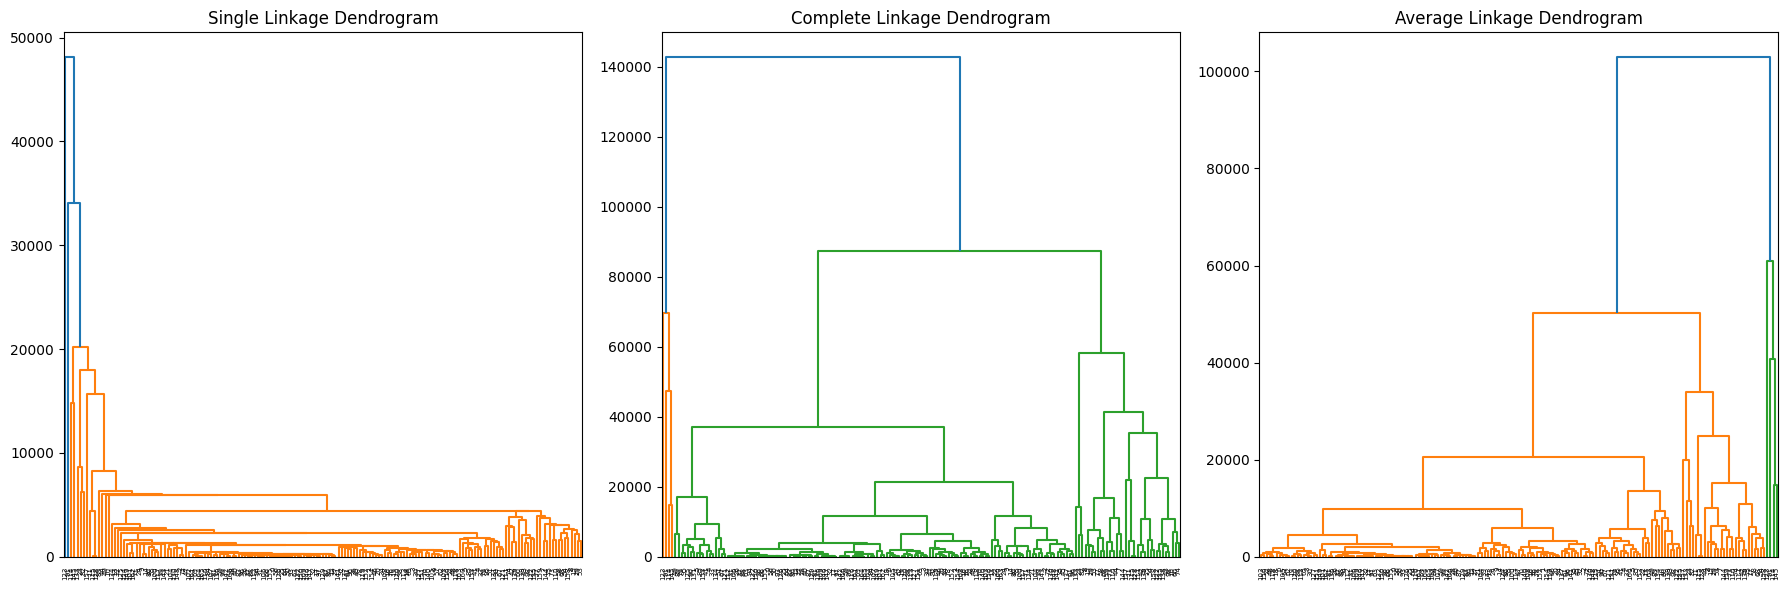

In [44]:
# Step 3: Visualize the dendrograms
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Single Linkage Dendrogram')
dendrogram(Z_single, leaf_rotation=90)

plt.subplot(1, 3, 2)
plt.title('Complete Linkage Dendrogram')
dendrogram(Z_complete, leaf_rotation=90)

plt.subplot(1, 3, 3)
plt.title('Average Linkage Dendrogram')
dendrogram(Z_average, leaf_rotation=90)

plt.tight_layout()
plt.show()

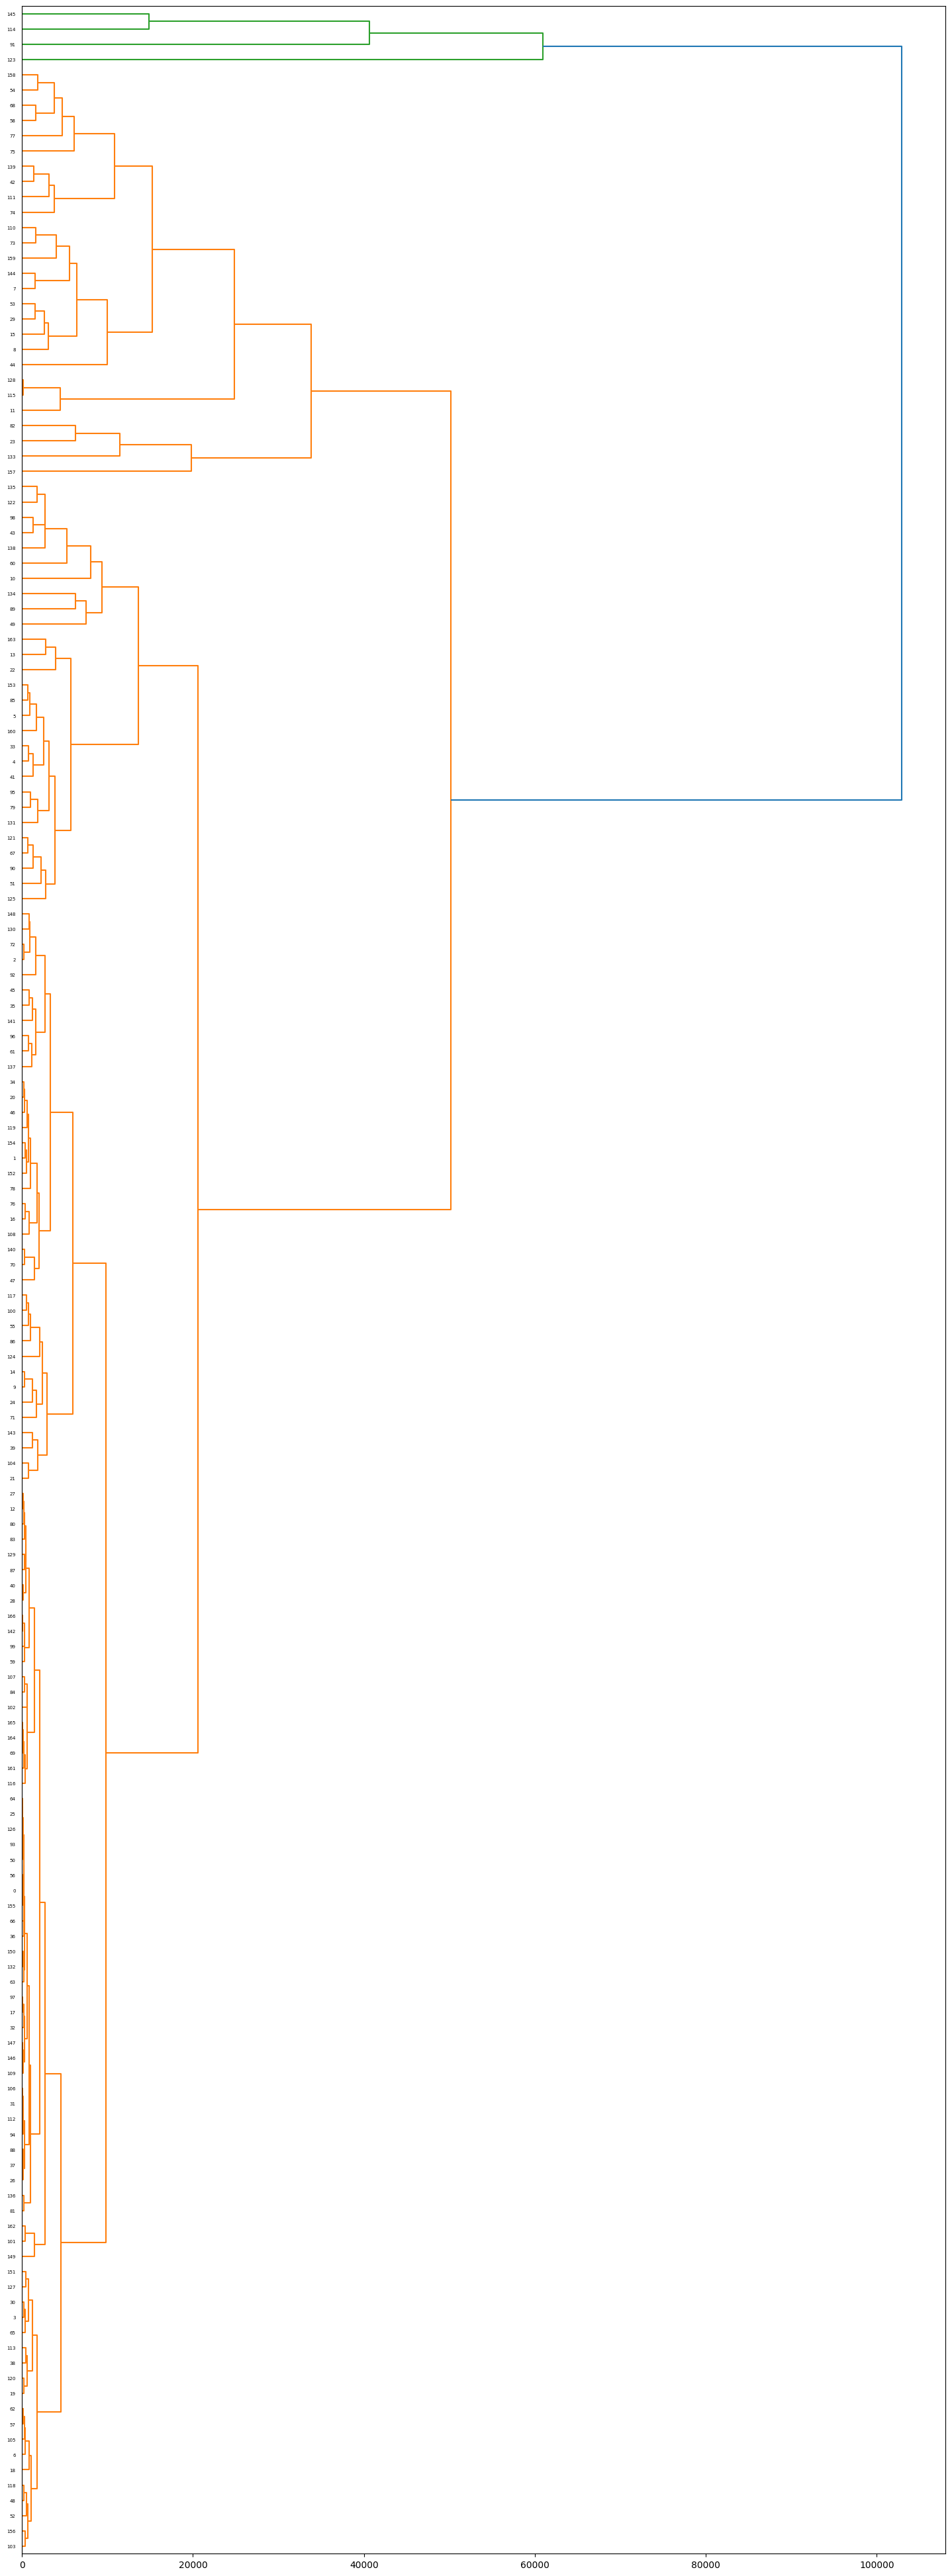

In [53]:
# average linkage dendogram magnified
plt.figure(figsize=(18, 50))
dendrogram(Z_average, leaf_rotation=0,orientation='right')
plt.show()
#due to the formations of many clusters the graph is not that visble